In [45]:
import glob, sys, os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15})

In [52]:
SITE = 'MQT'

pip_path = '../data/PIP/2015_' + SITE + '/netCDF/'
mrr_path = '../data/MRR/'
met_path = '../data/MET/'
era_path = '../data/ERA5/'

NANO_FACTOR = 1000000000


In [53]:
# Create script to loop through dir and plot when we have data from all variables

# ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
# times = np.asarray((ds_met['UTC Time'].values / NANO_FACTOR), dtype=int)
# utc_time = pd.to_datetime(times, unit='s', origin='unix')
# ds_met = ds_met.assign_coords(time = utc_time)

# mrr_dates = []
# for file in list(glob.glob(mrr_path + '*.nc')):                                       
#     mrr_dates.append(file[-16:-8])
    
# pip_dates = []
# for file in list(glob.glob(pip_path + '/edensity_distributions/*.nc')):
#     pip_dates.append(file[-37:-29])

# mrr_ds_dates = []
# for date in mrr_dates:
#     year = int(date[:4])
#     month = int(date[4:6])
#     day = int(date[-2:])
#     ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
#     if len(ds.time.values) > 0:
#         mrr_ds_dates.append(date)
        
# met_dates = []
# base_date = datetime.strptime('20190101', '%Y%m%d')
# for i in range(365):
#     new_date = base_date + timedelta(days=i)
#     year = new_date.year
#     month = new_date.month
#     day = new_date.day
#     ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
#     if len(ds.time.values) > 0:
#         met_dates.append(str(year) + str(month) + str(day))

# matched_dates = []
# for date in mrr_ds_dates:
#     files = glob.glob(pip_path + '/*/*' + date + '*.nc')
#     if len(files) == 4:
#         matched_dates.append(date)
        
# print("MRR:", len(mrr_dates), "MET:", len(met_dates), "PIP:", len(pip_dates))
# print("Matched:", len(matched_dates))
# print(matched_dates)


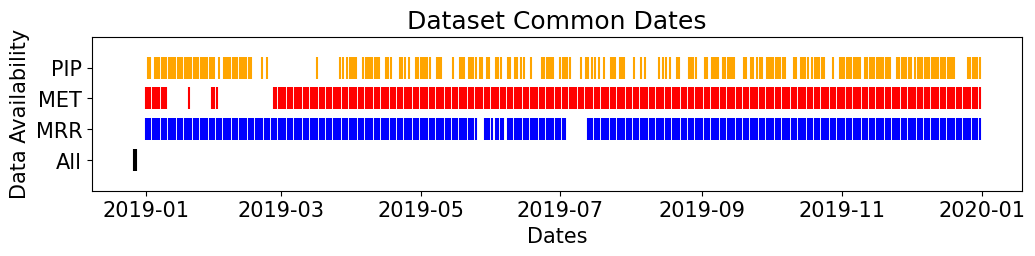

In [54]:

# matched_dates = ['20191121', '20191122']

m_dates = pd.to_datetime(matched_dates, format='%Y%m%d')
mrr_dates = pd.to_datetime(mrr_dates, format='%Y%m%d')
met_dates = pd.to_datetime(met_dates, format='%Y%m%d')
pip_dates = pd.to_datetime(pip_dates, format='%Y%m%d')

m_date_data = np.full(len(matched_dates), 0)
mrr_date_data = np.full(len(mrr_dates), 1)
met_date_data = np.full(len(met_dates), 2)
pip_date_data = np.full(len(pip_dates), 3)

fig, ax = plt.subplots(figsize=(12, 2))
plt.scatter(m_dates, m_date_data, marker='|', s=250, color='black')
plt.scatter(mrr_dates, mrr_date_data, marker='|', s=250, color='blue')
plt.scatter(met_dates, met_date_data, marker='|', s=250, color='red')
plt.scatter(pip_dates, pip_date_data, marker='|', s=250, color='orange')
plt.xlabel('Dates')
plt.ylabel('Data Availability')
ax.set_ylim((-1, 4))
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['All', 'MRR', 'MET', 'PIP'])
plt.title('Dataset Common Dates')
plt.show()

In [55]:
################# MRR DATA

# 500 -> 2000
# Thursday, 21 November 2019 08:19:00 (1574324340.0) to Friday, 22 November 2019 09:18:00 (1574414280.0)
def plot_data_for_day(year1, month1, day1, year2, month2, day2):

    SITE = 'MQT'

    pip_path = '../data/PIP/2019_' + SITE + '/netCDF/'
    mrr_path = '../data/MRR/'
    met_path = '../data/MET/'
    era_path = '../data/ERA5/'

    NANO_FACTOR = 1000000000

    date = year1 + month1 + day1
    date2 = year2 + month2 + day2
    ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_' + SITE + '_' + date + '_snow.nc')
    ds_mrr2 = xr.open_dataset(mrr_path + 'MRR_NWS_' + SITE + '_' + date2 + '_snow.nc')
    
    vline1 = 415
    vline2 = 575

    ax_shared = None

    ze = ds_mrr['Ze'].values
    dv = ds_mrr['W'].values
    sw = ds_mrr['spectralWidth'].values
    ze2 = ds_mrr2['Ze'].values
    dv2 = ds_mrr2['W'].values
    sw2 = ds_mrr2['spectralWidth'].values
    
    ze = np.concatenate([ze, ze2], axis=0)[500:2000,:]
    dv = np.concatenate([dv, dv2], axis=0)[500:2000,:]
    sw = np.concatenate([sw, sw2], axis=0)[500:2000,:]

    fig = plt.figure(figsize=(14,25))
    # fig.suptitle(SITE + ' ' + date)
    gs = gridspec.GridSpec(8, 2, width_ratios=[1, 0.025]) 
    ax = plt.subplot(gs[0, 0], sharex=ax_shared)
    ax.patch.set_facecolor('#000871')
    plt.grid(alpha=0.5)
    h = ax.imshow(ze.T, cmap='gist_ncar', vmin=-5, vmax=35, aspect='auto')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    cbar_ax = plt.subplot(gs[0, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Reflectivity (dBZ)")
    custom_y_labs = [0, 1, 2, 3]
    custom_y_indices = [0, 10, 20, 30]
    ax.set_yticks(custom_y_indices)
    ax.set_yticklabels(custom_y_labs)
    ax.set_ylabel("Height AGL (km)")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[1, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    h = ax.imshow(dv.T, cmap='coolwarm', vmin=-3, vmax=3, aspect='auto')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    cbar_ax = plt.subplot(gs[1, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Doppler Velocity (m s$^{-1}$)")
    ax.set_ylabel("Height AGL (km)")
    custom_y_labs = [0, 1, 2, 3]
    custom_y_indices = [0, 10, 20, 30]
    ax.set_yticks(custom_y_indices)
    ax.set_yticklabels(custom_y_labs)
    ax.invert_yaxis()
    
    # ax = plt.subplot(gs[2, 0])
    # h = ax.imshow(sw.T, cmap='viridis', vmin=0, vmax=1, aspect='auto')
    # cbar_ax = plt.subplot(gs[2, 1])
    # cbar = fig.colorbar(h, cax=cbar_ax)
    # cbar.set_label("Spectral Width (m s-1)")
    # ax.set_ylabel("Bin")
    # ax.invert_yaxis()
    
    ax = plt.subplot(gs[2, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/particle_size_distributions/006' + date + '2350_01_dsd.nc')   
    ds_pip2 = xr.open_dataset(pip_path + '/particle_size_distributions/006' + date2 + '2350_01_dsd.nc')   
    cbar_ax = plt.subplot(gs[2, 1])
    val = ds_pip['psd'].values
    val2 = ds_pip2['psd'].values
    h = ax.imshow(np.concatenate([val, val2])[500:2000,:].T, cmap='plasma', norm=LogNorm(vmin=0.1, vmax=10000), aspect='auto')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('PSD (m$^{−3}$ mm$^{−1}$)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 50, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylim((0, 81))
    ax.invert_yaxis()
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[3, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/velocity_distributions/006' + date + '2350_01_vvd_A.nc')
    ds_pip2 = xr.open_dataset(pip_path + '/velocity_distributions/006' + date2 + '2350_01_vvd_A.nc')
    cbar_ax = plt.subplot(gs[3, 1])   
    val = ds_pip['vvd'].values
    val2 = ds_pip2['vvd'].values
    h = ax.imshow(np.concatenate([val, val2])[500:2000,:].T, cmap='plasma', vmin=0, vmax=3, aspect='auto')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('VVD (m s$^{-1}$)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 50, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylim((0, 81))
    ax.invert_yaxis()
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[4, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    ax.patch.set_facecolor('white')
    ds_pip = xr.open_dataset(pip_path + '/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc')  
    ds_pip2 = xr.open_dataset(pip_path + '/edensity_distributions/006' + date2 + '2350_01_rho_Plots_D_minute.nc') 
    cbar_ax = plt.subplot(gs[4, 1])
    val = ds_pip['rho'].values
    val2 = ds_pip2['rho'].values

    final_ed = np.concatenate([val, val2])[500:2000,:].T
    final_ed[final_ed <= 0] = np.nan

    h = ax.imshow(final_ed, cmap='seismic', vmin=0, vmax=1, aspect='auto')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('Rho (g cm$^{-3}$)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 50, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylim((0, 81))
    ax.invert_yaxis()
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[5, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    ds_lwe = xr.open_dataset(pip_path + '/adjusted_edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc')  
    ds_lwe2 = xr.open_dataset(pip_path + '/adjusted_edensity_lwe_rate/006' + date2 + '2350_01_P_Minute.nc')   
    val = ds_lwe['nrr_adj'].values[500:2000]
    val2 = ds_lwe2['nrr_adj'].values[500:2000]
    rrval = ds_lwe['rr_adj'].values[500:2000]
    rrval2 = ds_lwe2['rr_adj'].values[500:2000]
    ax.set_xlim((0, 1500))
    ax.plot(np.arange(len(np.concatenate([val, val2]))), np.concatenate([val, val2]), color='blue', linewidth=2, label='Snow')
    ax.plot(np.arange(len(np.concatenate([rrval, rrval2]))), np.concatenate([rrval, rrval2]), color='red', linewidth=2, label='Rain')
    ax.axvline(vline1, linewidth=2, linestyle='--', color='black')
    ax.axvline(vline2, linewidth=2, linestyle='--', color='black')
    ax.legend(loc='lower right')
    ax.set_ylabel('Rate (mm hr$^{-1}$)')

    ## ERA5
    ds_era5 = xr.open_dataset(era_path + '/temperature.nc')
    data_slice = ds_era5.t[32:57, :, 2, 2]
    data_array = data_slice.values - 273.15 
    time_units = np.linspace(0, 24, 25) 
    levels = np.linspace(0, 19, 20)
    Time, Level = np.meshgrid(time_units, levels)

    ax = plt.subplot(gs[6, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    contour = ax.contourf(Time, Level, data_array.T, cmap='inferno', levels=20) 
    ax.axvline(6.65, linewidth=2, linestyle='--', color='black')
    ax.axvline(9.2, linewidth=2, linestyle='--', color='black')
    plt.gca().invert_yaxis()
    custom_pressure_levels = ['300', '550', '800', '1000']
    custom_pressure_indices = [0, 5, 11, 19]
    ax.set_yticks(custom_pressure_indices)
    ax.set_yticklabels(custom_pressure_levels)
    ax.set_xticks([0, 3.2, 6.4, 9.6, 12.8, 16, 19.2, 22.4])
    cbar_ax = plt.subplot(gs[6, 1])
    cbar = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label('Temperature (°C)')
    ax.set_ylabel('Pressure (hPa)')

    ax = plt.subplot(gs[7, 0], sharex=ax_shared)
    plt.grid(alpha=0.5)
    ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
    times = np.asarray((ds_met['UTC Time'].values / 1000000000), dtype=int)
    utc_time = pd.to_datetime(times, unit='s', origin='unix')
    ds_met = ds_met.assign_coords(time = utc_time)
    ds_met2 = ds_met.sel(time=(ds_met['time.year']==int(year2)) & (ds_met['time.month']==int(month2)) & (ds_met['time.day']==int(day2)))
    ds_met = ds_met.sel(time=(ds_met['time.year']==int(year1)) & (ds_met['time.month']==int(month1)) & (ds_met['time.day']==int(day1)))
    
    t = ds_met['Temp Out'].values  
    p = ds_met['Wind Speed'].values 
    t2 = ds_met2['Temp Out'].values  
    p2 = ds_met2['Wind Speed'].values
    d = ds_met['Dew Point'].values
    d2 = ds_met2['Dew Point'].values

    ax.plot(np.arange(len(np.append(t, t2)[100:399])), np.append(t, t2)[100:399], color='black', linewidth=2, label='T')
    ax.plot(np.arange(len(np.append(d, d2)[100:399])), np.append(d, d2)[100:399], color='gray', linewidth=2, label='DP')
    ax.legend(loc='lower right')
    ax.axhline(y=0, linestyle='--', color='black')
    ax.set_ylabel('Temperature (°C)')
    ax.set_xlim((0, 299))
    
    ax2 = ax.twinx()
    ax2.set_xlim((0, 299))
    ax2.plot(np.arange(len(np.append(p, p2)[100:399])), np.append(p, p2)[100:399], linewidth=2, color='red')
    ax2.axvline(83, linewidth=2, linestyle='--', color='black')
    ax2.axvline(115, linewidth=2, linestyle='--', color='black')
    ax2.set_ylabel('WS (m s$^{-1}$)')
    ax2.spines['right'].set_color('red')
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red') 
    ax_shared = ax
    ax.set_xticks(np.linspace(0, 279, 8)) 
    time_labels = pd.date_range(start='21 November 2019 08:19:00', end='22 November 2019 09:18:00', periods=8)
    ax.set_xticklabels(time_labels.strftime('%Y/%m/%d %H:%M:%S'), rotation=45, ha='right')

    for ax in fig.get_axes():
        if ax != ax_shared:
            plt.setp(ax.get_xticklabels(), visible=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
# plot_data_for_day('2019', '11', '21', '2019', '11', '22')


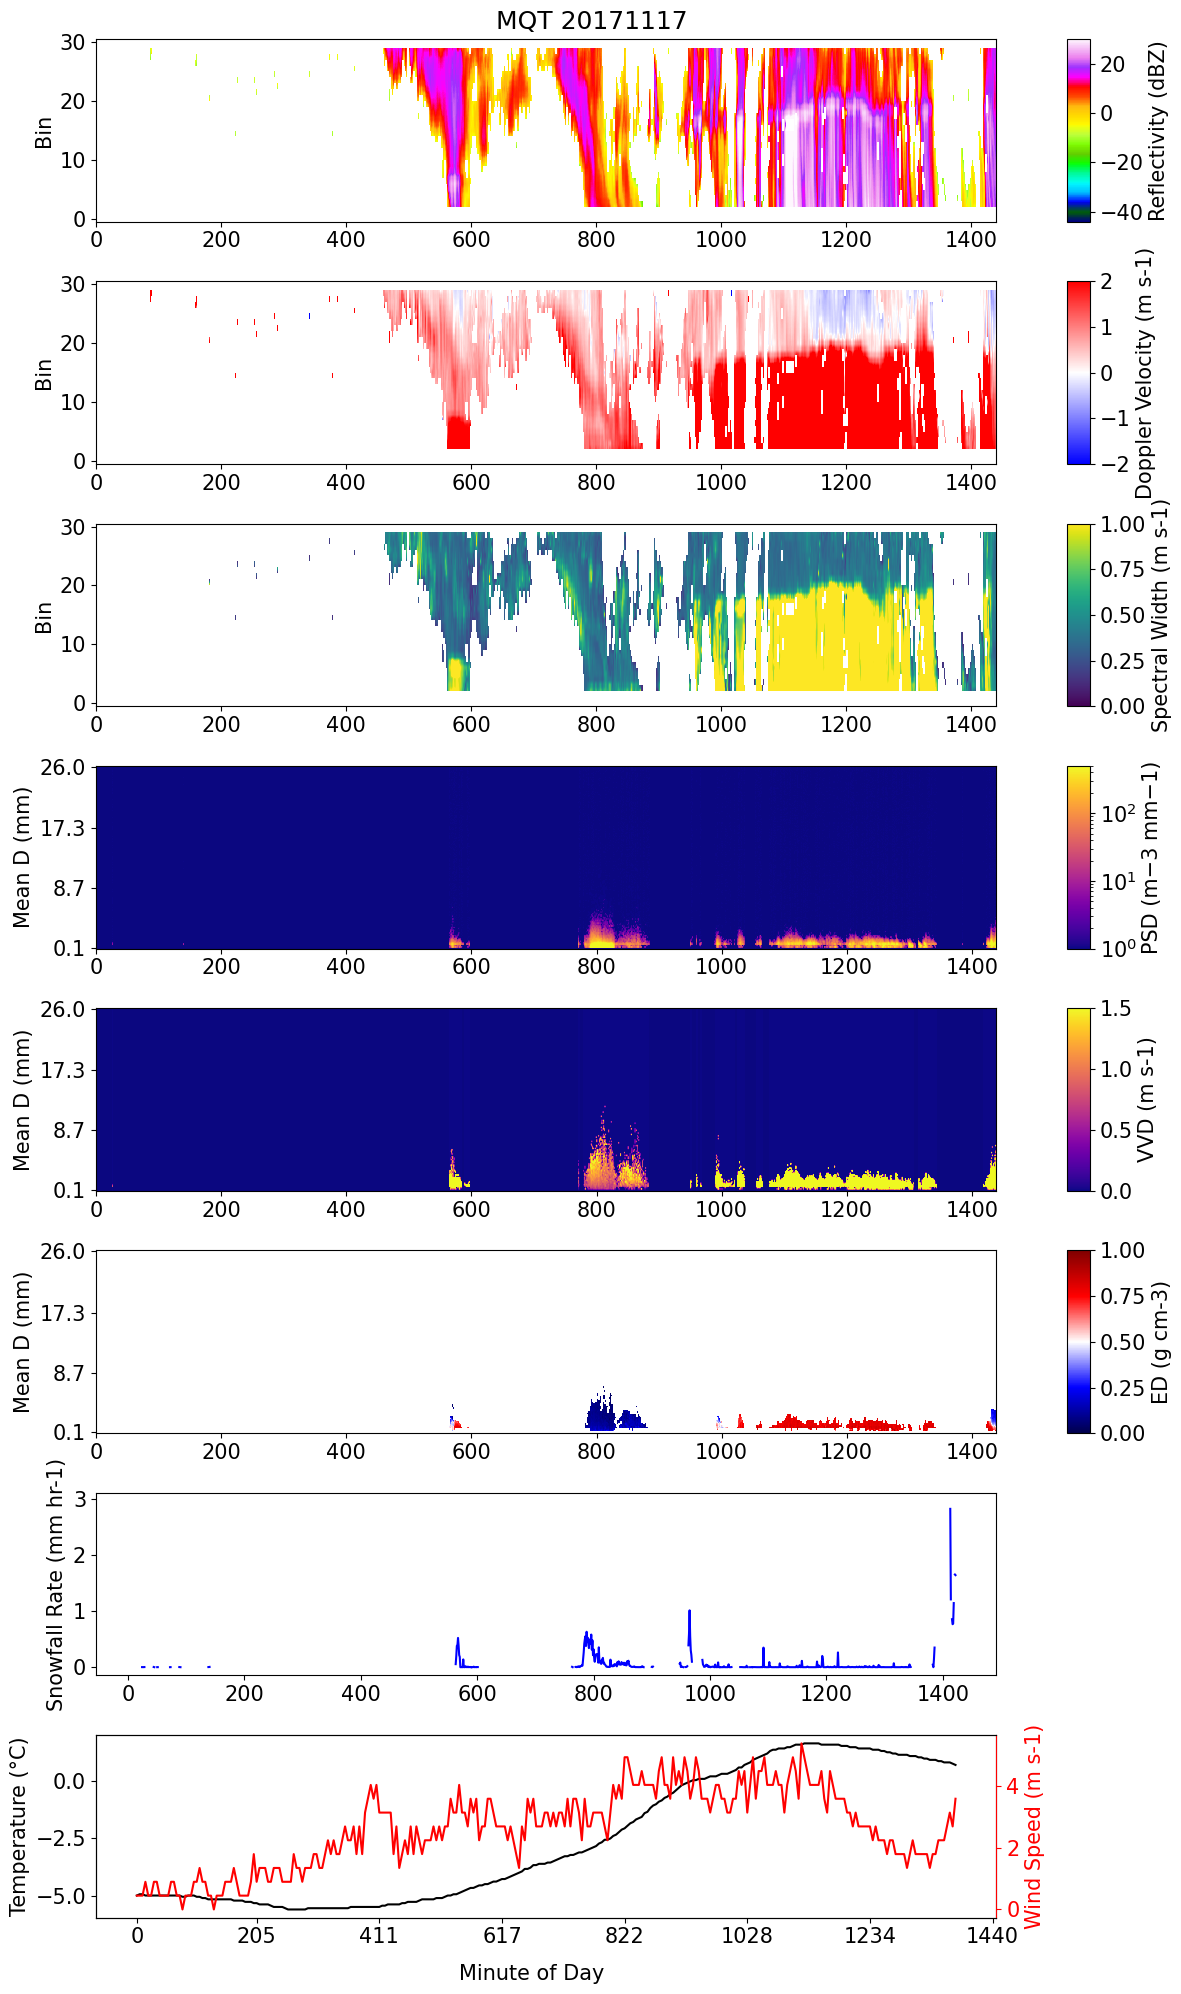

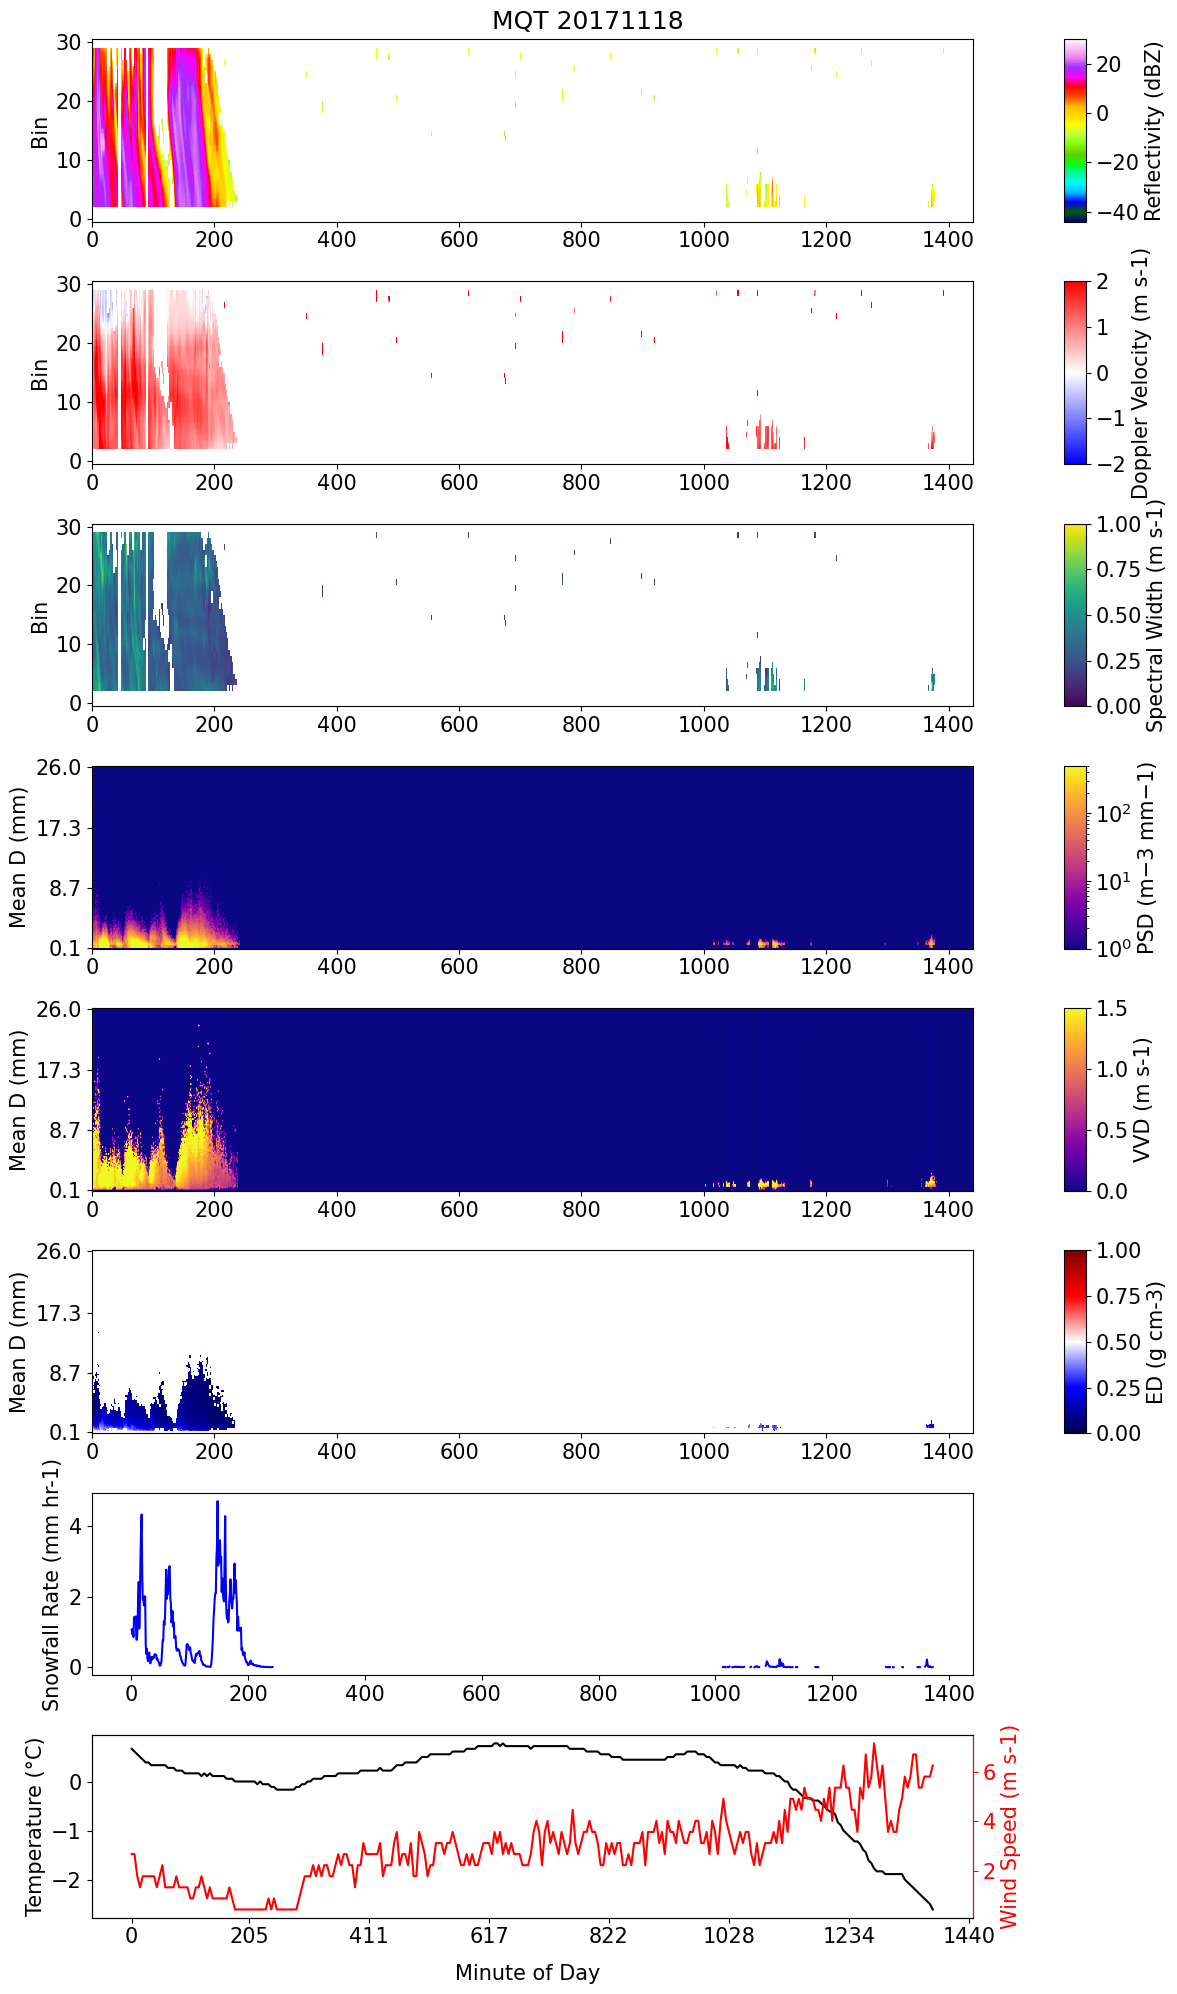

In [63]:
################# MRR DATA

def plot_data_for_day(year, month, day):
    date = year + month + day
    ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_' + SITE + '_' + date + '_snow.nc')
    
    ze = ds_mrr['Ze'].values
    dv = ds_mrr['W'].values
    sw = ds_mrr['spectralWidth'].values
    
    fig = plt.figure(figsize=(12,20))
    fig.suptitle(SITE + ' ' + date)
    gs = gridspec.GridSpec(8, 2, width_ratios=[1, 0.025]) 
    ax = plt.subplot(gs[0, 0])
    h = ax.imshow(ze.T, cmap='gist_ncar', vmin=-44, vmax=30, aspect='auto')
    cbar_ax = plt.subplot(gs[0, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Reflectivity (dBZ)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[1, 0])
    h = ax.imshow(dv.T, cmap='bwr', vmin=-2, vmax=2, aspect='auto')
    cbar_ax = plt.subplot(gs[1, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Doppler Velocity (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[2, 0])
    h = ax.imshow(sw.T, cmap='viridis', vmin=0, vmax=1, aspect='auto')
    cbar_ax = plt.subplot(gs[2, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Spectral Width (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[3, 0])
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/particle_size_distributions/006' + date + '2350_01_dsd.nc')   
    cbar_ax = plt.subplot(gs[3, 1])
    val = ds_pip['psd'].values
    h = ax.imshow(val.T, cmap='plasma', norm=LogNorm(vmin=1, vmax=500), aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('PSD (m−3 mm−1)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[4, 0])
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/velocity_distributions/006' + date + '2350_01_vvd_A.nc')
    cbar_ax = plt.subplot(gs[4, 1])   
    val = ds_pip['vvd'].values
    h = ax.imshow(val.T, cmap='plasma', vmin=0, vmax=1.5, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('VVD (m s-1)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[5, 0])
    # ax.patch.set_facecolor('blue')
    ds_pip = xr.open_dataset(pip_path + '/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc')   
    cbar_ax = plt.subplot(gs[5, 1])
    val = ds_pip['rho'].values
    val[val <= 0] = np.nan

    h = ax.imshow(val.T, cmap='seismic', vmin=0, vmax=1, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('ED (g cm-3)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    
    ax = plt.subplot(gs[6, 0])
    ds_lwe = xr.open_dataset(pip_path + '/adjusted_edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc')    
    val = ds_lwe['nrr'].values
    ax.plot(np.arange(len(val)), val, color='blue')
    ax.set_ylabel('Snowfall Rate (mm hr-1)')
    
    ax = plt.subplot(gs[7, 0])
    ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
    times = np.asarray((ds_met['UTC Time'].values / 1000000000), dtype=int)
    utc_time = pd.to_datetime(times, unit='s', origin='unix')
    ds_met = ds_met.assign_coords(time = utc_time)
    ds_met = ds_met.sel(time=(ds_met['time.year']==int(year)) & (ds_met['time.month']==int(month)) & (ds_met['time.day']==int(day)))
    
    t = ds_met['Temp Out'].values  
    p = ds_met['Wind Speed'].values     
    ax.plot(np.arange(len(t)), t, color='black')
    ax.set_ylabel('Temperature (°C)')
    
    x_ticks = np.linspace(0, 300, 8, dtype=int)
    x_labels = np.linspace(0, 1440, 8, dtype=int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    
    ax2 = ax.twinx()
    ax2.plot(np.arange(len(p)), p, color='red')
    ax2.set_ylabel('Wind Speed (m s-1)')
    ax2.spines['right'].set_color('red')
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    fig.text(0.45, -0.005, 'Minute of Day', ha='center')
    
    plt.tight_layout()
    plt.show()

pip_path = '../data/PIP/2017_' + SITE + '/netCDF/'
# matched_dates = ['20160316']
matched_dates = ['20171117', '20171118']
# matched_dates = ['20150410', '20151113', '20151201']
# matched_dates = ['20181227', '20181228']
for date in matched_dates:
    year = date[:4]
    month = date[4:6]
    day = date[-2:]
    plot_data_for_day(year, month, day)


In [ ]:
 
def find_good_data(year):
    # Path where the .nc files are stored
    data_path = '/Users/fraserking/Development/pip_processing/data/converted/' + str(year) + '_MQT/netCDF/edensity_distributions/'

    # List all files in data_path
    files = [f for f in os.listdir(data_path) if f.endswith('.nc')]

    # Loop through each .nc file
    for file in files:
        try:
            # Open the .nc file
            ds_pip = xr.open_dataset(data_path + file)
            
            # Extract the 'rho' variable values
            val = ds_pip['rho'].values
            
            # Replace all values <= 0 with nan
            val[val <= 0] = np.nan
            
            # Calculate the difference between nanmax and nanmin
            std_dev = np.nanstd(val)
            
            # Calculate the percentage of non-nan values
            non_nan_percentage = np.sum(~np.isnan(val)) / np.prod(val.shape) * 100

            # Check conditions
            if std_dev > 0.2 and non_nan_percentage >= 5:
                print(f"Filename: {file} {std_dev} {non_nan_percentage}")
            

        except Exception as e:
            print(f"Error processing file {file}: {e}")

for i in range(2015, 2020):
    find_good_data(i)

Filename: 006201504102350_01_rho_Plots_D_minute.nc 0.25104861936290945 10.61598812553011
Filename: 006201511132350_01_rho_Plots_D_minute.nc 0.2015208415226697 8.65511026293469
Filename: 006201512012350_01_rho_Plots_D_minute.nc 0.27286881489544573 5.313295165394402
Filename: 006201504202350_01_rho_Plots_D_minute.nc 0.33947443182214526 6.004558948261239
Filename: 006201603162350_01_rho_Plots_D_minute.nc 0.2691160463545811 5.240670059372349
Filename: 006201712052350_01_rho_Plots_D_minute.nc 0.2324399293319509 6.714376590330789
Filename: 006201704272350_01_rho_Plots_D_minute.nc 0.3448775686866409 5.064673452078032
Filename: 006201710242350_01_rho_Plots_D_minute.nc 0.28212449284005753 8.027459711620017
Filename: 006201812272350_01_rho_Plots_D_minute.nc 0.21723593823600068 5.934584393553859
Filename: 006201801112350_01_rho_Plots_D_minute.nc 0.2155706309249519 7.128392705682781
Filename: 006201812282350_01_rho_Plots_D_minute.nc 0.20853129319665337 10.594783715012724
Filename: 006201911212350_